In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hep = pd.read_csv("datasets/hepatitis/HepatitisCdata.csv")
# Me saco de encima el índice que traía el csv (también podría haber hecho index_col=0 pero prefiero que arranque en 0 el id)
hep = hep[hep.columns[1:]]
# Numerical hepatitis df
num_hep = hep.drop(["Category", "Sex"], axis=1)
# Categorical hepatitis df
cat_hep = hep[["Category", "Sex"]]
hep

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
hep.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [3]:
# Me fijo si infirió bien los tipos de datos
hep.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [4]:
# Vemos que no todas las columnas tienen la misma cantidad de entradas
hep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [5]:
# Un par de números
hep.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


## CORRELATION MATRIX

Text(0.5, 1.0, 'Hepatitis df Correlation Matrix')

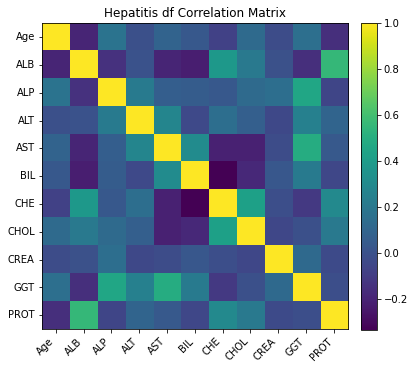

In [6]:
plt.figure(figsize=(6,6))
corr_matrix = num_hep.corr(method="pearson")
plt.imshow(corr_matrix)
plt.xticks(np.arange(11), num_hep.columns, rotation=45, ha='right', va='top')
plt.yticks(np.arange(11), num_hep.columns, rotation=0, ha='right', va='center')
plt.colorbar(fraction=0.0459, pad=0.04)  # Magia que encontré online para que la colorbar quede alineada
plt.title("Hepatitis df Correlation Matrix")

## Violin plots

In [7]:
# Me tengo que sacar los NaN de encima porque sino crashean los plots
num_hep.isna().sum()

Age      0
ALB      1
ALP     18
ALT      1
AST      0
BIL      0
CHE      0
CHOL    10
CREA     0
GGT      0
PROT     1
dtype: int64

In [11]:
# LLeno los NaNs con el promedio de la columna
# Igual creo que puede llegar a tener más sentido eliminar las filas con NaNs
num_hep_clean = num_hep.copy()
for var in num_hep.columns:
#     print(np.where(num_hep[var].isna()<1, num_hep[var], num_hep[var].mean()))
    num_hep_clean[var] = np.where(num_hep[var].isna()<1, num_hep[var], num_hep[var].mean())
    
# Checkeo
num_hep_clean.isna().sum()

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 32. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 35. 35. 35.
 35. 35. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36. 36. 36. 36. 36. 36. 37.
 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 38. 38.
 38. 38. 38. 38. 38. 38. 38. 38. 39. 39. 39. 39. 39. 39. 39. 39. 39. 39.
 39. 39. 40. 40. 40. 40. 40. 40. 40. 40. 41. 41. 41. 41. 41. 41. 41. 41.
 42. 42. 42. 42. 42. 42. 42. 42. 42. 43. 43. 43. 43. 43. 43. 43. 43. 43.
 43. 43. 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 45. 45. 45. 45. 45. 45.
 45. 45. 45. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 46. 47.
 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 48. 48. 48. 48. 48. 48.
 48. 48. 48. 48. 48. 48. 49. 49. 49. 49. 49. 49. 49. 49. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 51. 51. 51. 51. 51. 51. 51. 51. 52. 52.
 52. 52. 52. 52. 52. 52. 52. 52. 52. 52. 53. 53. 53. 53. 53. 53. 53. 53.
 53. 53. 54. 54. 54. 54. 54. 54. 55. 55. 55. 55. 55

Age     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [9]:
np

<module 'numpy' from 'c:\\users\\suare\\myscripts\\ml\\venv\\lib\\site-packages\\numpy\\__init__.py'>

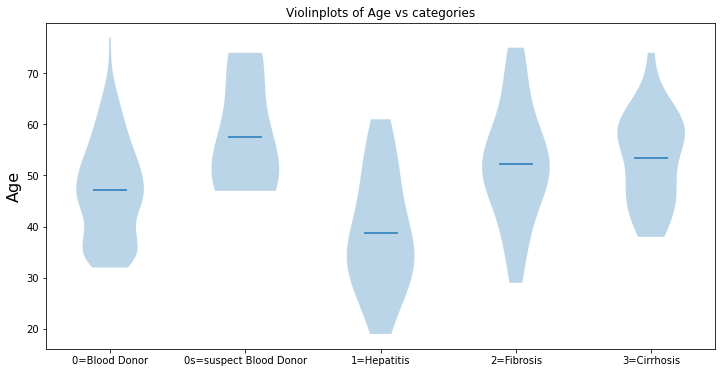

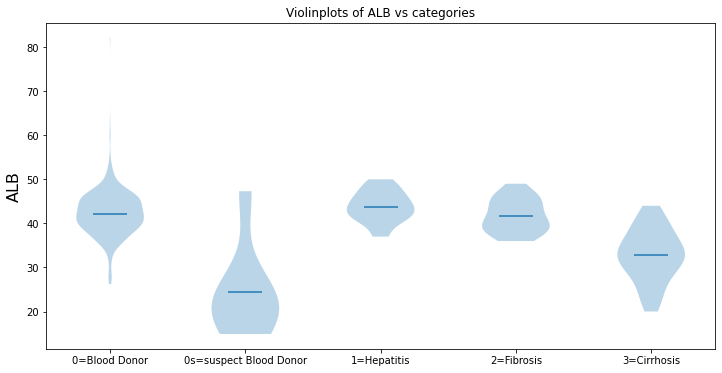

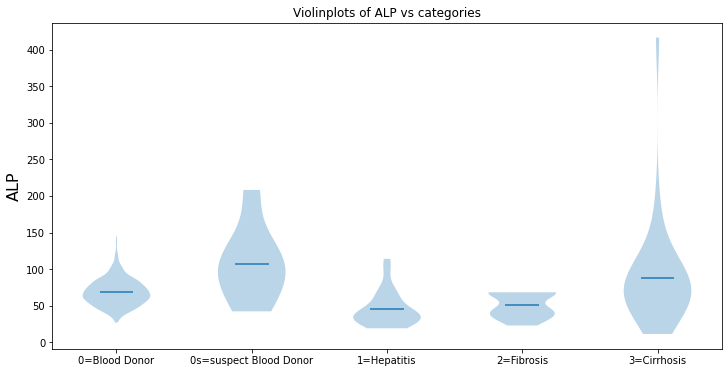

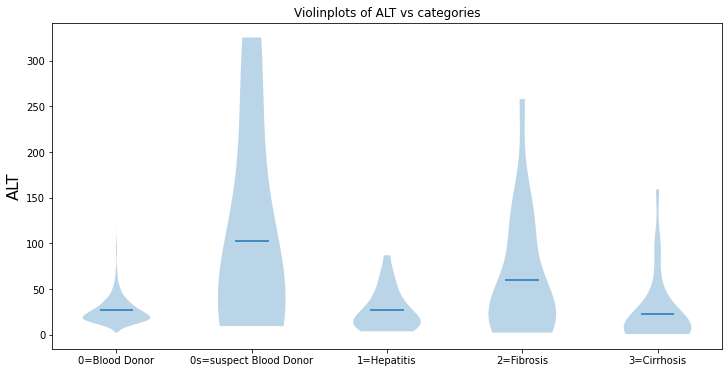

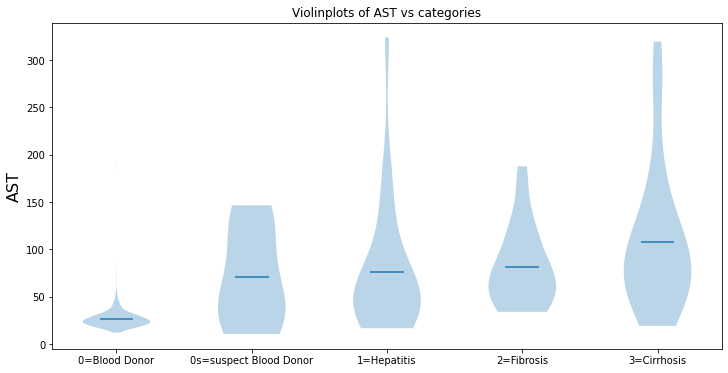

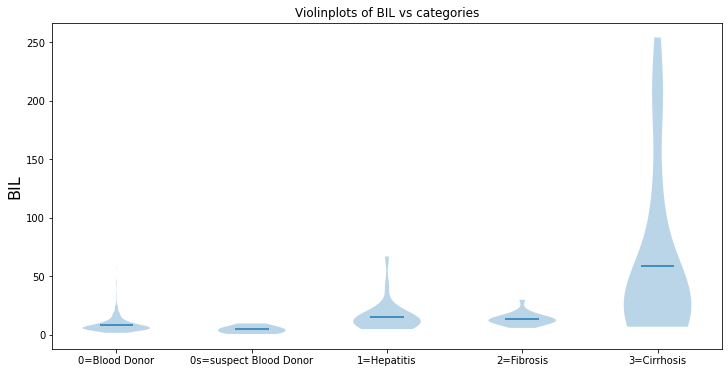

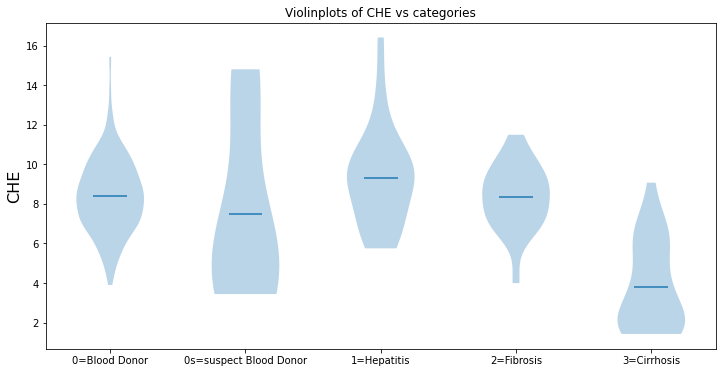

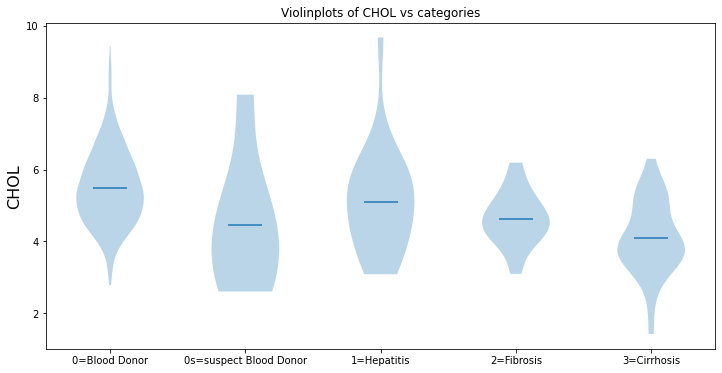

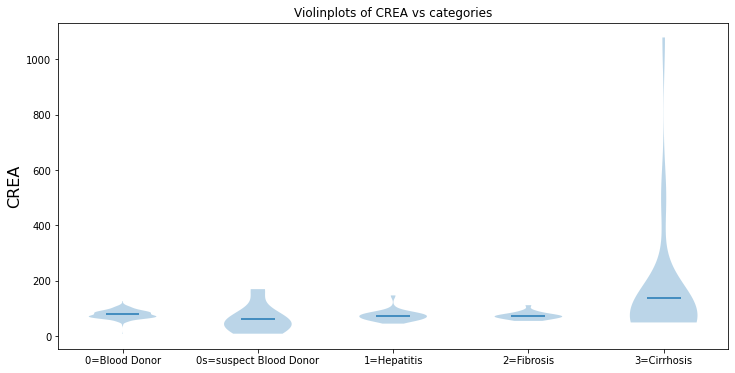

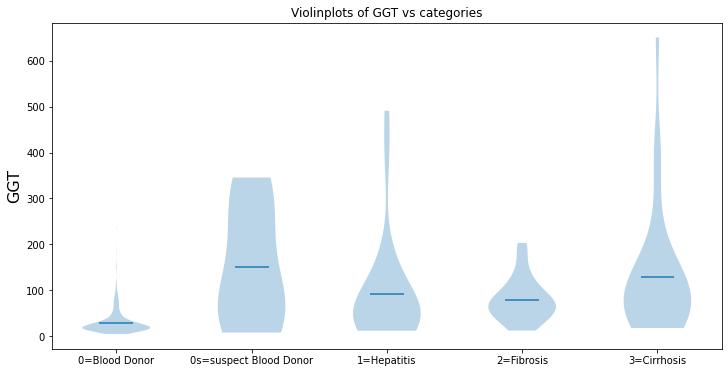

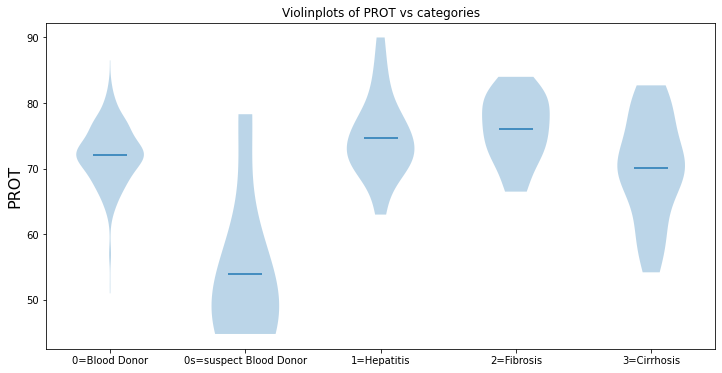

In [10]:
def violinplot(variable):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    categories = hep["Category"].unique()

    # sacando saturación
    # datos = [housing.loc[(housing.ocean_proximity == cat) & (housing.median_house_value < 500000)].median_house_value for 
    #          cat in categories]

    datos = [num_hep_clean.loc[(hep["Category"] == cat)][variable] for cat in categories]

    ax.violinplot(dataset=datos, showextrema=False, showmeans=True, points=1000)
    ax.xaxis.set_ticks(range(1, len(categories)+1))
    ax.xaxis.set_ticklabels(categories)

    ax.set_ylabel(variable, fontsize=16)
    plt.title(f"Violinplots of {variable} vs categories")

for var in num_hep_clean.columns:
    violinplot(var)